Hyperparameters and Model Validation	
    Thinking About Model Validation -> Telling the model is good or bad
	Selecting the Best Model -> Classifcaition -> Naive , decision , random forest,SVM -SVC (Feasible slns) --> (Optimal/ Best Sln)
    
	Learning Curves  -> DL , NN
	Validation in Practice: Grid Search

Classification:
    1.F1 score: What is F1 score? 
        F1 score (also known as F-measure, or balanced F-score) is an error metric which measures model performance by calculating the harmonic mean of precision and recall for the minority positive class.
        F1 score = 2 * (Precision * recall)/(precision +recall)
   eg: 
   from sklearn.metrics import f1_score
    y_true = [0, 1, 0, 0, 1, 1]
    y_pred = [0, 0, 1, 0, 0, 1]
    f1 = f1_score(y_true, y_pred)
    
    
    > 0.9 Very good
    0.8 - 0.9 Good 
    0.5 - 0.8 OK 
    < 0.5 Not good
    
   1.A model will obtain a high F1 score if both Precision and Recall are high 
   2.A model will obtain a low F1 score if both Precision and Recall are low 
   3.A model will obtain a medium F1 score if one of Precision and Recall is low and the other is high
   
   
 2.Confusion matrix ->display the performance of model
 
  True , False 
  Positive or Negative
  
 
  1.True Positive: This combination tells us how many times a model correctly classifies a positive sample as Positive? 
   eg: Gender classifier model -> Female image => yes it is female
   
  2.False Negative: This combination tells us how many times a model incorrectly classifies a positive sample as Negative?
   eg: Gender classifier model -> Female image => It is a Male 
   
  3.False Positive: This combination tells us how many times a model incorrectly classifies a negative sample as Positive?
    eg: Gender classifier model -> Female image => It is not a male  
  
  4.True Negative: This combination tells us how many times a model correctly classifies a negative sample as Negative?
  
     eg: Gender classifier model -> Female image => It is not a female
     
    from sklearn.metrics import confusion_matrix
    y_true = [2, 0, 2, 2, 0, 1]
    y_pred = [0, 0, 2, 2, 0, 2]
    confusion_matrix(y_true, y_pred)
    
    
3. Precision
    eg: Gender class --> the model classifies gender correctly 
    Precision = True Positive/(True Positive + False Positive)  
                =TP / TP+FP
              TP =2 , FP =1
              =2/3 =0.66
     1 -> 100% -> outstanding
     0.75 -> Reasonable value but not outstanding
     < 0.75 -> Improve   
     
     
    eg:
    from sklearn.metrics import precision_score
    y_true = [0, 1, 2, 0, 1, 2]
    y_pred = [0, 2, 1, 0, 0, 1]
    precision_score(y_true, y_pred)

4.Recall -> This model corectly identified the o/p
      Recall = True Positive/(True Positive + False Negative)
              =TP/TP+FN
              
       TP = 2
       FN= 1  
       Recall= 2/3=0.66
       
       0.75 -> good
       <0.75 -> improve
       1- outstanding 
       0 -> bad
       
    eg:
       from sklearn.metrics import recall_score
        y_true = [0, 1, 2, 0, 1, 2]
        y_pred = [0, 2, 1, 0, 0, 1]
        recall_score(y_true, y_pred)   
        
5.AUC score - Area Under the Receiver Operating Characteristic Curve (ROC AUC)

    from sklearn.metrics import roc_auc_score
    y_true = [0,1,1,0,0,1]
    y_pred = [0,0,1,1,0,1]
    auc = roc_auc_score(y_true, y_pred)


    AUC score	Interpretation
    >0.8	Very good performance
    0.7-0.8	Good performance
    0.5-0.7	OK performance
    <0.5  As good as random choice
    
How can I improve my AUC score?
To improve your AUC score there are three things that you could do:
1.Add more features to your dataset which provide some signal for the target
2.Tweak your model by adjusting parameters or the type of model used
3.Change the probability threshold at which the classes are chosen
  

In [5]:
#Model validation the right way
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split #--> High level  

#Loading data
iris = load_iris()
X = iris.data
y = iris.target

#creating model
model = KNeighborsClassifier(n_neighbors=1)

#creating train & test data
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.5)


#model 1 
model.fit(X1, y1)
y2_model = model.predict(X2)
#model 2
y1_model = model.fit(X2, y2).predict(X1)

#model 3 --> It is a bad way of model validation
model.fit(X,y)
y_model=model.predict(X)


#Evaluation tech
print(accuracy_score(y2,y2_model)) #testing data y2
print(accuracy_score(y1,y1_model)) # training data y1
print(accuracy_score(y, y_model)) # testing the same data trained

0.9066666666666666
0.96
1.0


Selecting the Best Model

1.Use a more complicated/more flexible model
2.Use a less complicated/less flexible model
3.Gather more training samples
4.Gather more data to add features to each sample

In [6]:
#Learning Curves 
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
from sklearn.linear_model import Ridge # ridge regreesion -> Regularization(Improves the estimation of any problem)

np.random.seed(0)
X, y = load_iris(return_X_y=True)
indices = np.arange(y.shape[0])
np.random.shuffle(indices) # shuffle -> take first axis of every dimesn array
X, y = X[indices], y[indices]

train_scores, valid_scores = validation_curve(
    Ridge(), X, y, param_name="alpha", param_range=np.logspace(-7, 3, 3),
    cv=5) #--> cv -> cross validation , ridge--> estimator

print(train_scores)
print(valid_scores)

[[0.93402178 0.94366418 0.92648383 0.91933313 0.92922507]
 [0.9340217  0.94366412 0.92648377 0.91933304 0.929225  ]
 [0.51143526 0.52415737 0.49868907 0.47086988 0.49623503]]
[[0.9055033  0.84185935 0.94569793 0.96231017 0.93366144]
 [0.90550088 0.84184574 0.94568969 0.96233172 0.93366806]
 [0.46706558 0.25698974 0.50496293 0.49826404 0.52500014]]


In [7]:
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC

train_sizes, train_scores, valid_scores = learning_curve(
    SVC(kernel='linear'), X, y, train_sizes=[50, 80, 110], cv=5)
print(train_sizes)
print(train_scores)
print(valid_scores)

[ 50  80 110]
[[0.98       0.98       0.98       0.98       0.98      ]
 [0.9875     1.         0.9875     0.9875     0.9875    ]
 [0.98181818 1.         0.98181818 0.98181818 0.99090909]]
[[1.         0.93333333 1.         1.         0.96666667]
 [1.         0.96666667 1.         1.         0.96666667]
 [1.         0.96666667 1.         1.         0.96666667]]


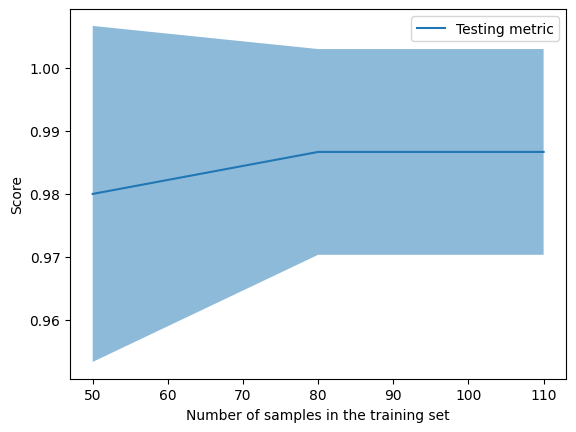

In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import LearningCurveDisplay
from sklearn.svm import SVC
from sklearn.utils import shuffle

X, y = load_iris(return_X_y=True)
X, y = shuffle(X, y, random_state=0)
LearningCurveDisplay.from_estimator(
   SVC(kernel="linear"), X, y, train_sizes=[50, 80, 110], cv=5)

Feature Engineering	 - Data 
    Categorical Features -> non-numerical data
	Text Features 
	Image Features
	Derived Features
	Imputation of Missing Data
	Feature Pipelines

In [3]:
# Categorical Features -> non-numerical data


data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]

from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=True, dtype=int)
print(vec.fit_transform(data))

  (0, 1)	1
  (0, 3)	850000
  (0, 4)	4
  (1, 0)	1
  (1, 3)	700000
  (1, 4)	3
  (2, 2)	1
  (2, 3)	650000
  (2, 4)	3
  (3, 0)	1
  (3, 3)	600000
  (3, 4)	2


In [7]:
#Text Features 

sample = ['problem of evil',
          'evil queen',
          'horizon problem']
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform(sample)
print(X)
import pandas as pd
m=pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())
print(m)

  (0, 3)	1
  (0, 2)	1
  (0, 0)	1
  (1, 0)	1
  (1, 4)	1
  (2, 3)	1
  (2, 1)	1
   evil  horizon  of  problem  queen
0     1        0   1        1      0
1     1        0   0        0      1
2     0        1   0        1      0


In [8]:
#term frequency-inverse document frequency (TF–IDF) 

from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
n=pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())
print(n)

       evil   horizon        of   problem     queen
0  0.517856  0.000000  0.680919  0.517856  0.000000
1  0.605349  0.000000  0.000000  0.000000  0.795961
2  0.000000  0.795961  0.000000  0.605349  0.000000


In [ ]:
#Image Features -- Refer doc 19 

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


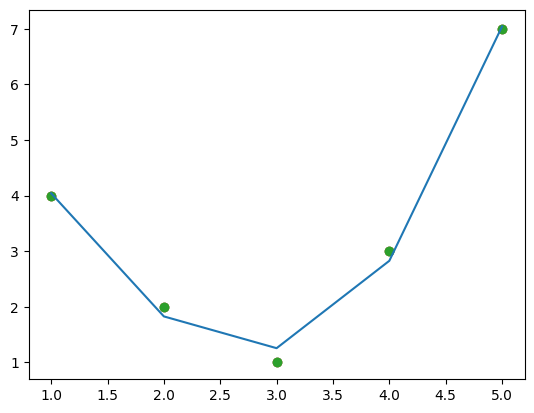

In [15]:
#Derived features -> 1+1
import numpy as np
import matplotlib.pyplot as plt
x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y);
from sklearn.linear_model import LinearRegression #--> Prediction , forecasting
X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x, y)
#plt.plot(x, yfit);
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)
print(X2)
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit);

In [17]:
#Imputation of Missing Data

from numpy import nan
X = np.array([[ nan, 0,   3  ],
              [ 3,   7,   9  ],
              [ 3,   5,   2  ],
              [ 4,   nan, 6  ],
              [ 8,   8,   1  ]])
y = np.array([14, 16, -1,  8, -5])
print(X)

from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean') # median, most_frequent, constant (ur choice)
X2 = imp.fit_transform(X)
print(X2)

[[nan  0.  3.]
 [ 3.  7.  9.]
 [ 3.  5.  2.]
 [ 4. nan  6.]
 [ 8.  8.  1.]]
[[4.5 0.  3. ]
 [3.  7.  9. ]
 [3.  5.  2. ]
 [4.  5.  6. ]
 [8.  8.  1. ]]


In [19]:
#Feature Pipelines

from sklearn.pipeline import make_pipeline
model = make_pipeline(SimpleImputer(strategy='mean'),
                      PolynomialFeatures(degree=2),
                      LinearRegression())
model.fit(X, y)
print(y)
print(model.predict(X))



[14 16 -1  8 -5]
[14. 16. -1.  8. -5.]
